<a href="https://colab.research.google.com/github/FarhanMilkCandy/CSE475/blob/main/image_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Program to classify images

In [ ]:
#imports
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Loading data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
#Viewing data
print(type(x_test))
print(type(y_test))
print(type(x_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
#shape of the arrays
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(10000, 32, 32, 3)
(10000, 1)
(50000, 32, 32, 3)
(50000, 1)


In [ ]:
#Viewing first image as array
index = 10
x_train[index]

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

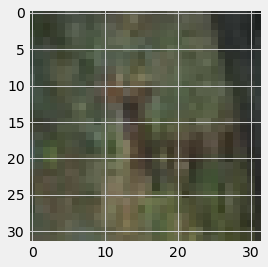

In [ ]:
#viewing first image as picture
img = plt.imshow(x_train[index])

In [ ]:
#image label
print('Image label:', y_train[index])

Image label: [4]


In [ ]:
#get image classification
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse','ship', 'truck']
print('Image class: ', classification[y_train[index][0]])

Image class:  deer


In [ ]:
#converting labels to set of 10 m=numbers to input into to the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
#printing new labels
print('y_train:', y_train_one_hot)
print('y_test:', y_test_one_hot)

y_train: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
y_test: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [ ]:
#New label of image above
print('The one hot label :', y_train_one_hot[index])

The one hot label : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
#Normalize the pixels to be values between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train[index]

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

In [ ]:
#Model architecture
model =  Sequential()

#Adding first Convolution layer
model.add(Conv2D(32, (3,3), activation='relu', input_shape = (32,32,3)))

#Adding 1st pooling layer
model.add(MaxPooling2D(pool_size= (2,2)))

#Adding 2nd Convolution layer
model.add(Conv2D(64, (5,5), activation='relu'))

#Adding 2nd pooling layer
model.add(MaxPooling2D(pool_size= (2,2)))

#Adding first flattening layer
model.add(Flatten())

#ADding Layer of 1000 nuerons
model.add(Dense(1000, activation='relu'))

#Adding a dropout layer
model.add(Dropout(0.5))

#ADding Layer of 500 nuerons
model.add(Dense(500, activation='relu'))

#Adding a dropout layer
model.add(Dropout(0.5))

#ADding Layer of 250 nuerons
model.add(Dense(250, activation='relu'))

#ADding Layer of 10 nuerons
model.add(Dense(10, activation='softmax'))

In [ ]:
#compiling model
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
#Training the model
hist = model.fit(x_train, y_train_one_hot, batch_size= 256, epochs= 11, validation_split= 0.2)

Epoch 1/11
157/157 [==============================] - 53s 336ms/step - loss: 1.7921 - accuracy: 0.3327 - val_loss: 1.5173 - val_accuracy: 0.4422
Epoch 2/11
157/157 [==============================] - 53s 337ms/step - loss: 1.4123 - accuracy: 0.4858 - val_loss: 1.2699 - val_accuracy: 0.5503
Epoch 3/11
157/157 [==============================] - 53s 336ms/step - loss: 1.2404 - accuracy: 0.5560 - val_loss: 1.1768 - val_accuracy: 0.5795
Epoch 4/11
157/157 [==============================] - 53s 336ms/step - loss: 1.1396 - accuracy: 0.5923 - val_loss: 1.1448 - val_accuracy: 0.5921
Epoch 5/11
157/157 [==============================] - 53s 336ms/step - loss: 1.0546 - accuracy: 0.6235 - val_loss: 1.0741 - val_accuracy: 0.6152
Epoch 6/11
157/157 [==============================] - 53s 336ms/step - loss: 0.9912 - accuracy: 0.6498 - val_loss: 1.0099 - val_accuracy: 0.6427
Epoch 7/11
157/157 [==============================] - 53s 335ms/step - loss: 0.9185 - accuracy: 0.6765 - val_loss: 0.9589 - val_ac

In [ ]:
#Evaluating the model using test dataset
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 4s 14ms/step - loss: 0.9728 - accuracy: 0.6735


0.6735000014305115

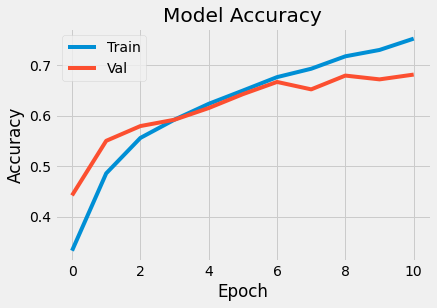

In [ ]:
#Visualizing Model accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

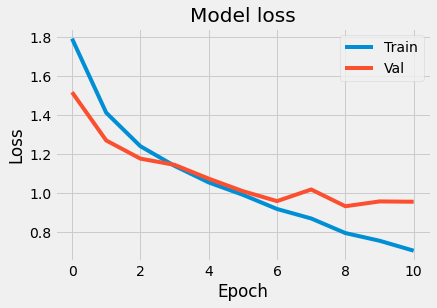

In [ ]:
#Visualizing model loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

In [ ]:
#Testing the model
from google.colab import files
uploaded = files.upload()

Saving CRUISE.jpg to CRUISE (2).jpg


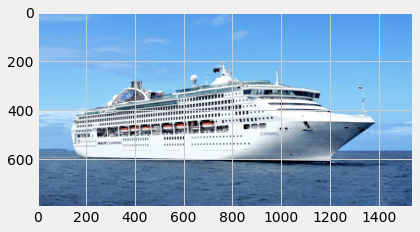

In [ ]:
#Showing image
uploaded_img = plt.imread('CRUISE.jpg')
img = plt.imshow(uploaded_img)

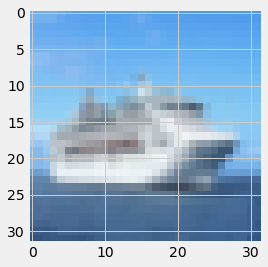

In [ ]:
#Resizing image
from skimage.transform import resize
resized_img = resize(uploaded_img, (32,32,3))
img = plt.imshow(resized_img)

In [ ]:
#Getting the models prediction
pred = model.predict(np.array([resized_img]))

#Showing predictions
pred

array([[1.05474452e-02, 2.23379611e-05, 7.45316676e-04, 2.26901771e-04,
        8.31770449e-05, 2.51594265e-05, 8.56687184e-05, 1.30493959e-06,
        9.88155246e-01, 1.07455606e-04]], dtype=float32)

In [ ]:
#Sorting predictions descending
list_index = [0,1,2,3,4,5,6,7, 8, 9]
x = pred

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
  
#showing sorted label in order
print(list_index)

[8, 0, 2, 3, 9, 6, 4, 5, 1, 7]


In [ ]:
#print the first 5 most likely classifications
for i in range(5):
  print(classification[list_index[i]], ':', pred[0][list_index[i]]*100, '%')

ship : 98.81552457809448 %
airplane : 1.054744515568018 %
bird : 0.07453166763298213 %
cat : 0.022690177138429135 %
truck : 0.010745560575742275 %
